# 1. FCB Exercises 3.3 : Tumor counts

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# n : number / sy : sum of yi's
# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for thetaA ~ gamma(a1,b1)
a1 = 120
b1 = 10
prior1 = st.gamma(a1, scale= 1/b1)

# data in group A(no bachelor's) and posterior distribution
# n=number of observed women, sy=sum of their numbers of chldren
nA = 10
syA = 117
postA = st.gamma(a1+syA, scale=1/(b1+nA))


# prior parameters for thetaB ~ gamma(a1,b1)
a2 = 12
b2 = 1
prior2 = st.gamma(a2, scale= 1/b2)

# data in group B(bachelor's) and posterior distribution
nB = 13
syB = 113
postB = st.gamma(a2+syB, scale=1/(b2+nB))



## Group A Bayesian Analysis

In [2]:
# posterior mean (Group A)
(a1+syA)/(b1+nA)

11.85

In [3]:
# posterior mode (Group A)
(a1+syA-1)/(b1+nA)

11.8

In [4]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA)) 
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

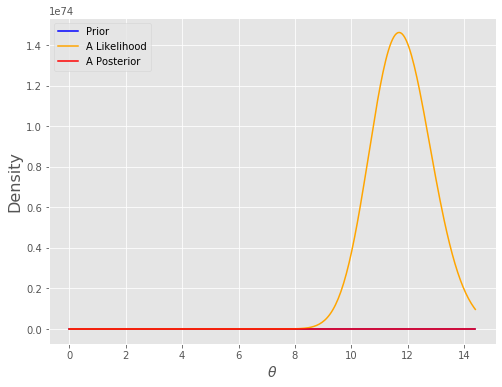

In [5]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas,likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas,postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

## Group B Bayesian Analysis

In [6]:
# posterior mean (Group B)
(a2+syB)/(b2+nB)

8.928571428571429

In [7]:
# posterior mode (Group B)
(a2+syB-1)/(b2+nB)

8.857142857142858

In [8]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

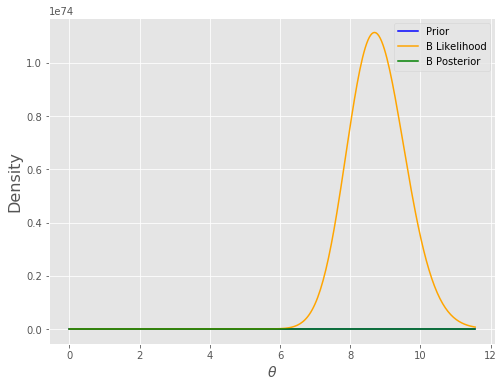

In [9]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior2.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

## Comparing Two Posterior Distributions

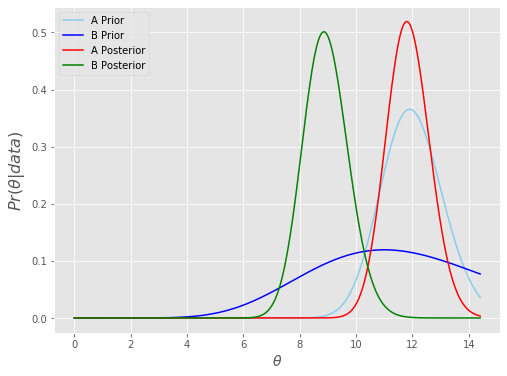

In [10]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='skyblue')
plt.plot(thetas, prior2.pdf(thetas), label='B Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

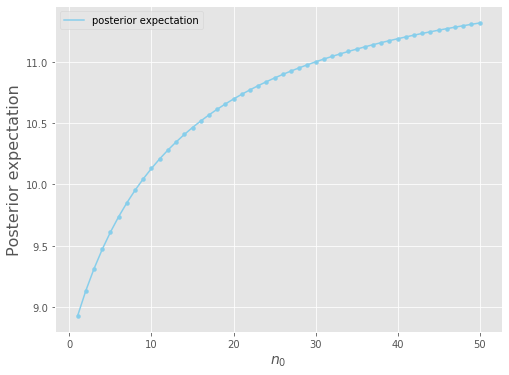

In [11]:
nzeros = np.linspace(1, 50, 50)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(nzeros, (12*nzeros+syB)/(nzeros+nB), label='posterior expectation', c='skyblue')
plt.scatter(nzeros, (12*nzeros+syB)/(nzeros+nB), c='skyblue', s=15)
plt.xlabel(r'$n_{0}$', fontsize=14)
plt.ylabel("Posterior expectation", fontsize=16)
plt.legend();

$n_0$ 가 커질수록 Post 기댓값($\theta$)도 12로 증가하며 수렴함.

A의 경우 사전지식이 있음에 따라 강한 prior belief. B는 A와 연관이 있다해도 A보다는 약한 prior belief.
독립이라고 봐도 무방할 듯 하다.

# 2. Data가 binomial distribution일때, Likelihood를 Exponential Families 형태로 변환해 보기. 또한 왜 Beta distribution이 Conjugacy인지 생각해 보기.

# 3. Relationship between Poisson distribution and Negative Binomial Distribution

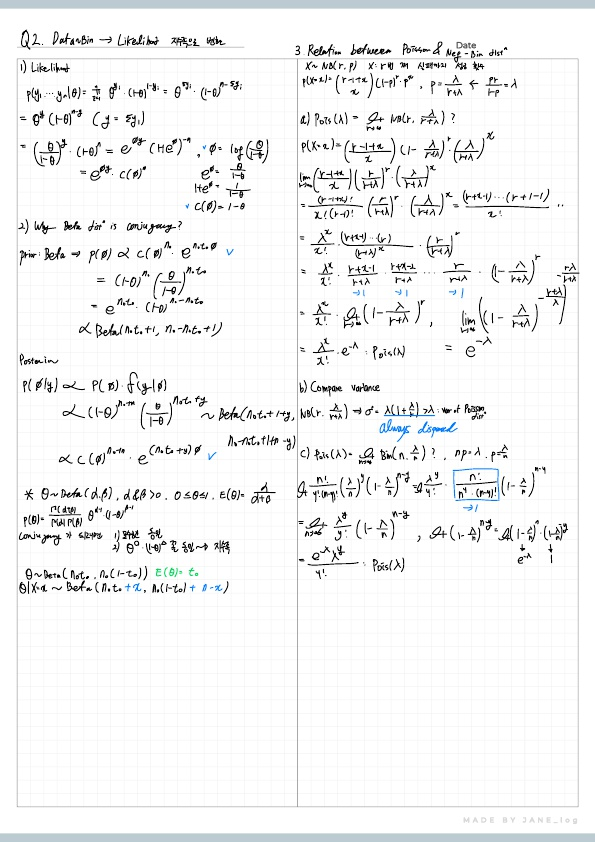